### Figure 1B. From Eco-HAB time stamps to time series of mice positional information


In [16]:
from EcoHab_xc import *
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import seaborn as sns
import matplotlib as mpl
import scipy.optimize as so
import scipy.io
mpl.rcParams['figure.dpi'] = 100

In [2]:
ehd = EcoHabData(path = '../data/C57_males_TIMP/C57_MALES_11-22.05.2018_LONG_BEFORE_TIMP/C57_MALES_11-22.05.2018_LONG_BEFORE_TIMP_raw_data')
# ehd = EcoHabData(path = '../data/C57_males_TIMP/C57_MALES_26.05-06.05.2018_LONG_AFTER_TIMP/C57_MALES_26.05-06.05.2018_LONG_AFTER_TIMP_raw_data')

# ehd = EcoHabData(path = '../data/C57_females_TIMP/C57_FEMALES_13-24.04.2018_LONG_BEFORE_TIMP/C57_FEMALES_13-24.04.2018_LONG_BEFORE_TIMP_raw_data')
# ehd = EcoHabData(path = '../data/C57_females_TIMP/C57_FEMALES_30.04-11.05.2018_LONG_AFTER_TIMP/C57_FEMALES_30.04-11.05.2018_LONG_AFTER_TIMP_raw_data')
# ehd = EcoHabData(path = '../data/C57_males_20181012')
# ehd = EcoHabData(path = '../data/C57_males_20200701')




Antenna not working
1 :
Sun May 13 09:07:28 2018 Sun May 13 10:15:49 2018
Wed May 16 05:37:56 2018 Wed May 16 07:04:58 2018
2 :
Sun May 13 09:07:25 2018 Sun May 13 10:15:48 2018
Wed May 16 05:37:57 2018 Wed May 16 07:04:57 2018
3 :
Sun May 13 09:08:43 2018 Sun May 13 10:13:04 2018
Wed May 16 05:38:41 2018 Wed May 16 07:05:56 2018
4 :
Sun May 13 09:08:39 2018 Sun May 13 10:13:05 2018
Wed May 16 05:38:40 2018 Wed May 16 07:05:57 2018
5 :
Sun May 13 09:07:43 2018 Sun May 13 10:13:19 2018
Tue May 15 09:16:17 2018 Tue May 15 10:17:31 2018
Wed May 16 05:37:08 2018 Wed May 16 07:11:41 2018
6 :
Sun May 13 09:07:39 2018 Sun May 13 10:13:20 2018
Tue May 15 09:10:27 2018 Tue May 15 10:17:34 2018
Wed May 16 05:37:09 2018 Wed May 16 07:11:41 2018
7 :
Sun May 13 09:07:35 2018 Sun May 13 10:13:23 2018
Wed May 16 05:37:32 2018 Wed May 16 07:11:27 2018
8 :
Sun May 13 09:07:31 2018 Sun May 13 10:13:23 2018
Wed May 16 05:37:33 2018 Wed May 16 07:11:26 2018
1 7 766 0.0 per 100
6 8 877 0.0 per 100
2 8 723 

In [3]:
ehs = EcoHabSessions_xc(ehd)


In [10]:
mouseId = ehd.mice[0]
tAll = ehd.gettimes(mouseId)
tFinal = tAll[-1]
tInitial = tAll[0]

for mouseId in ehd.mice:    
    tAll = ehd.gettimes(mouseId)
    if tAll[-1] > tFinal:
        tFinal = tAll[-1]
        
    if tAll[0] < tInitial: 
        tInitial = tAll[0]


print(tInitial, tFinal)

1526032866.248 1526964028.961


### Plot ethogram

Note: set dt = 1s or 2s to save time series of positional information in MAT files.

0


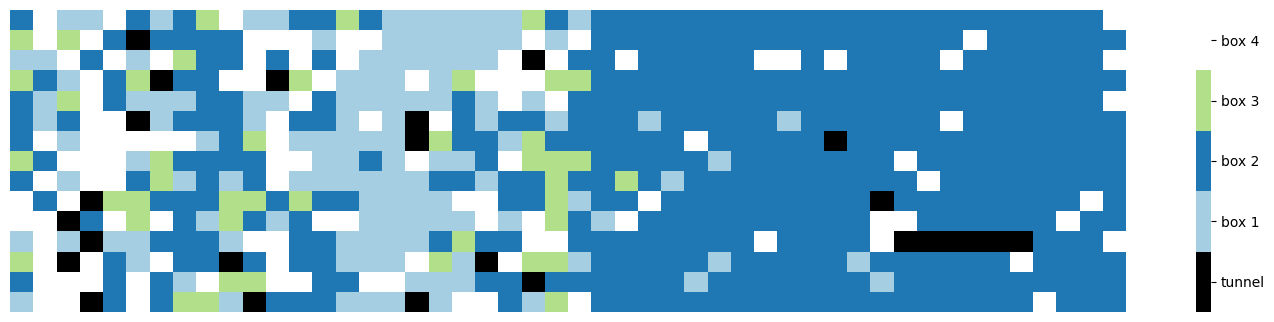

1


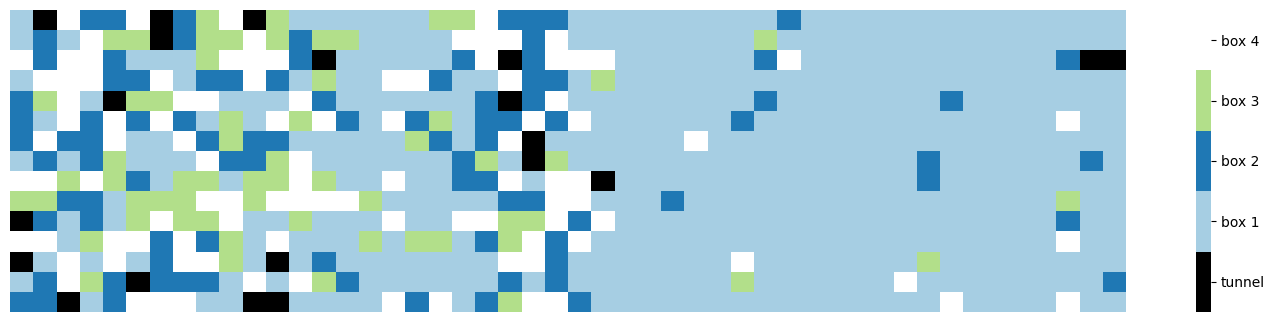

2


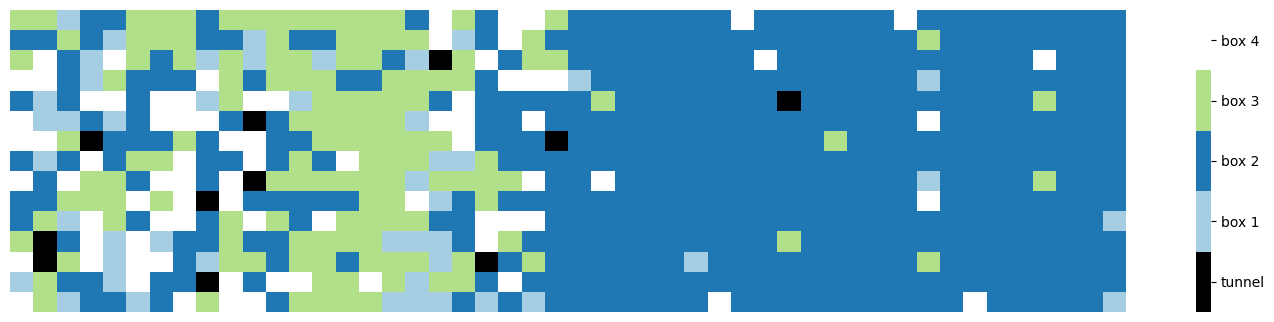

3


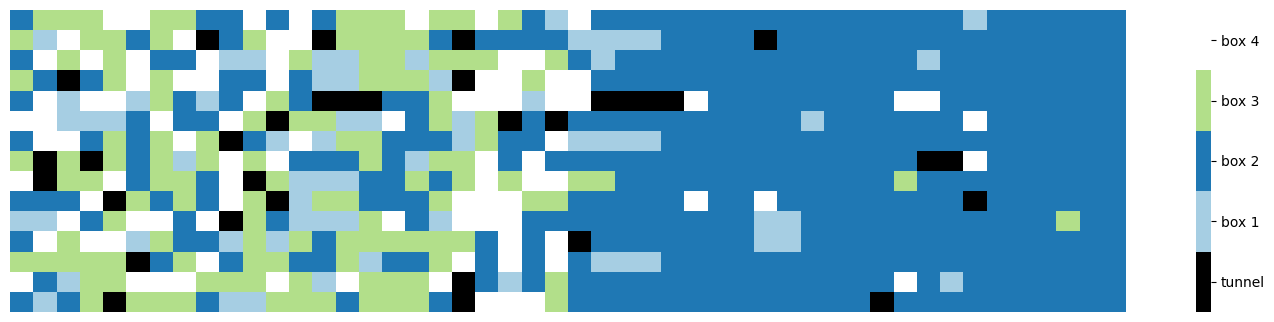

4


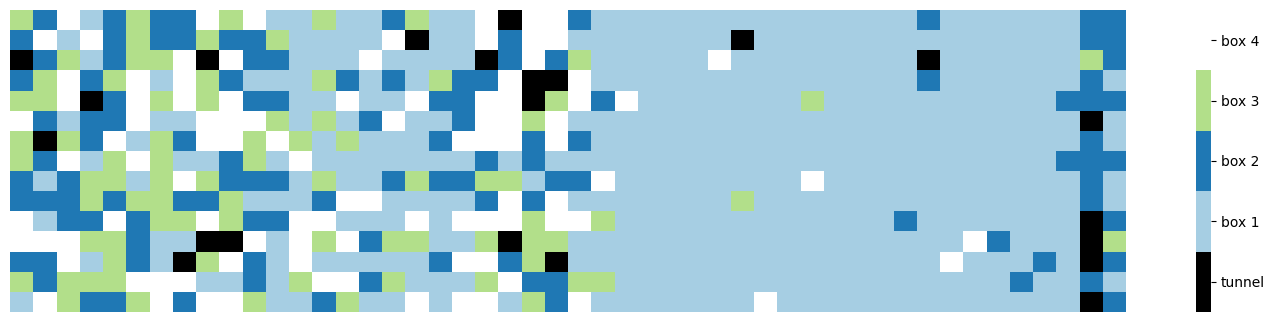

5


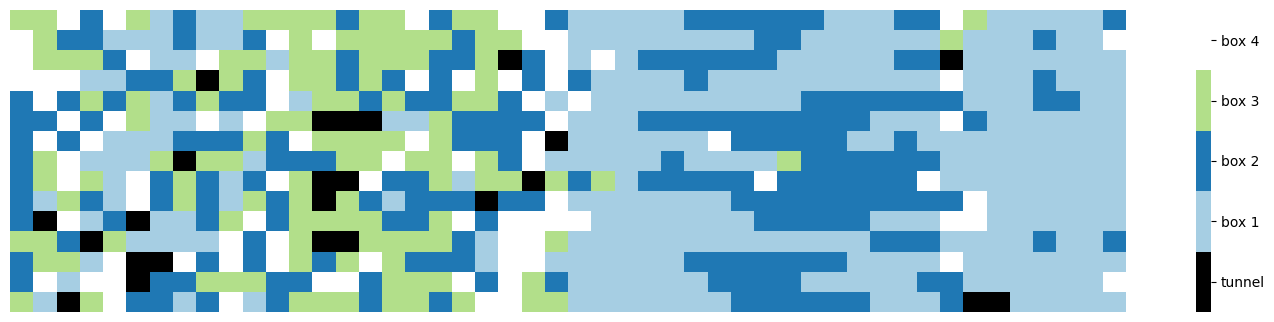

6


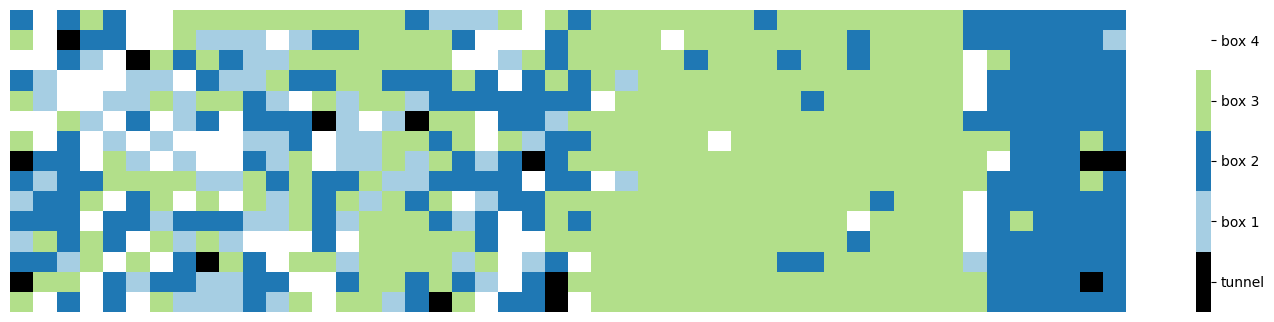

7


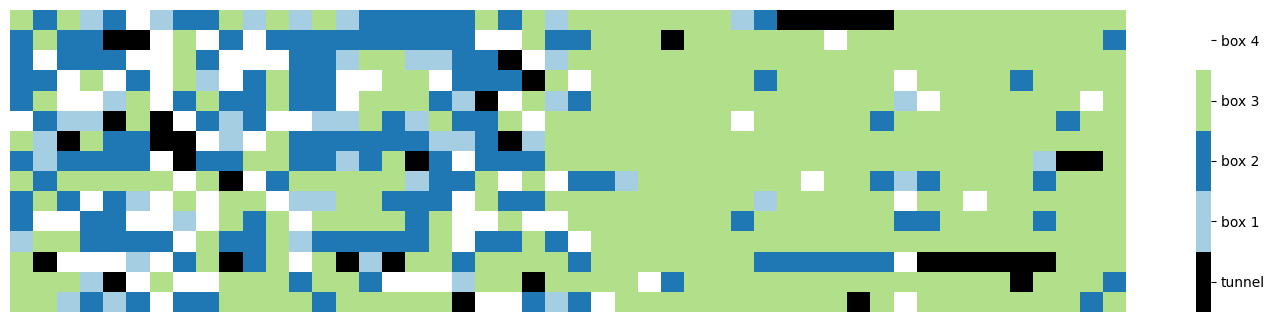

8


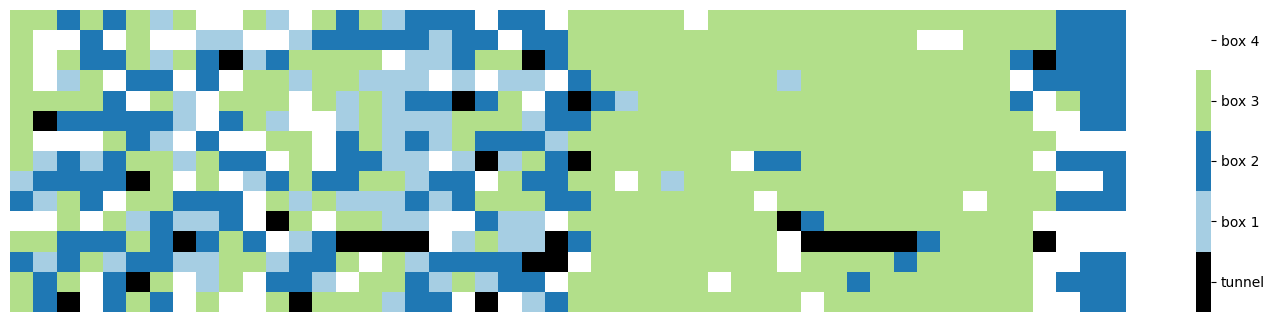

9


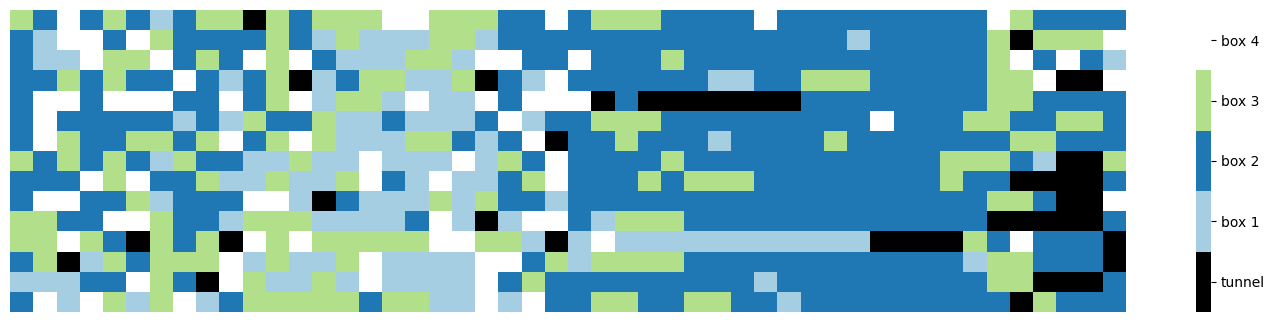

In [49]:
dt = 1800 #1 #time resolution of the ethogram
etho = []

for i in range(0,10): 
    print(i)
    ti = ehs.getti() + (i*24)*60*60 # choose time segment
#     tf = ti + 12*60*60
    tf = ti + 24*60*60
    ehs.mask_data(ti, tf)
    etho1 = ehs.plotetho(ehs.mice,dt,plotFlag=True)

#     fp = '../data/data_dt' + str(dt) + 's/etho_male_c57_20200701_12hr_dt' + str(dt) + 's_d' + str(i) + '.mat'
#     fp = '../data/data_dt' + str(dt) + 's/etho_male_c57_181012_12hr_dt' + str(dt) + 's_d' + str(i) + '.mat'
#     fp = '../data/data_dt' + str(dt) + 's/etho_male_after_timp_180526_12hr_dt' + str(dt) + 's_d' + str(i) + '.mat'

#     scipy.io.savemat(fp,mdict={'s':etho1})

    etho.append(etho1)


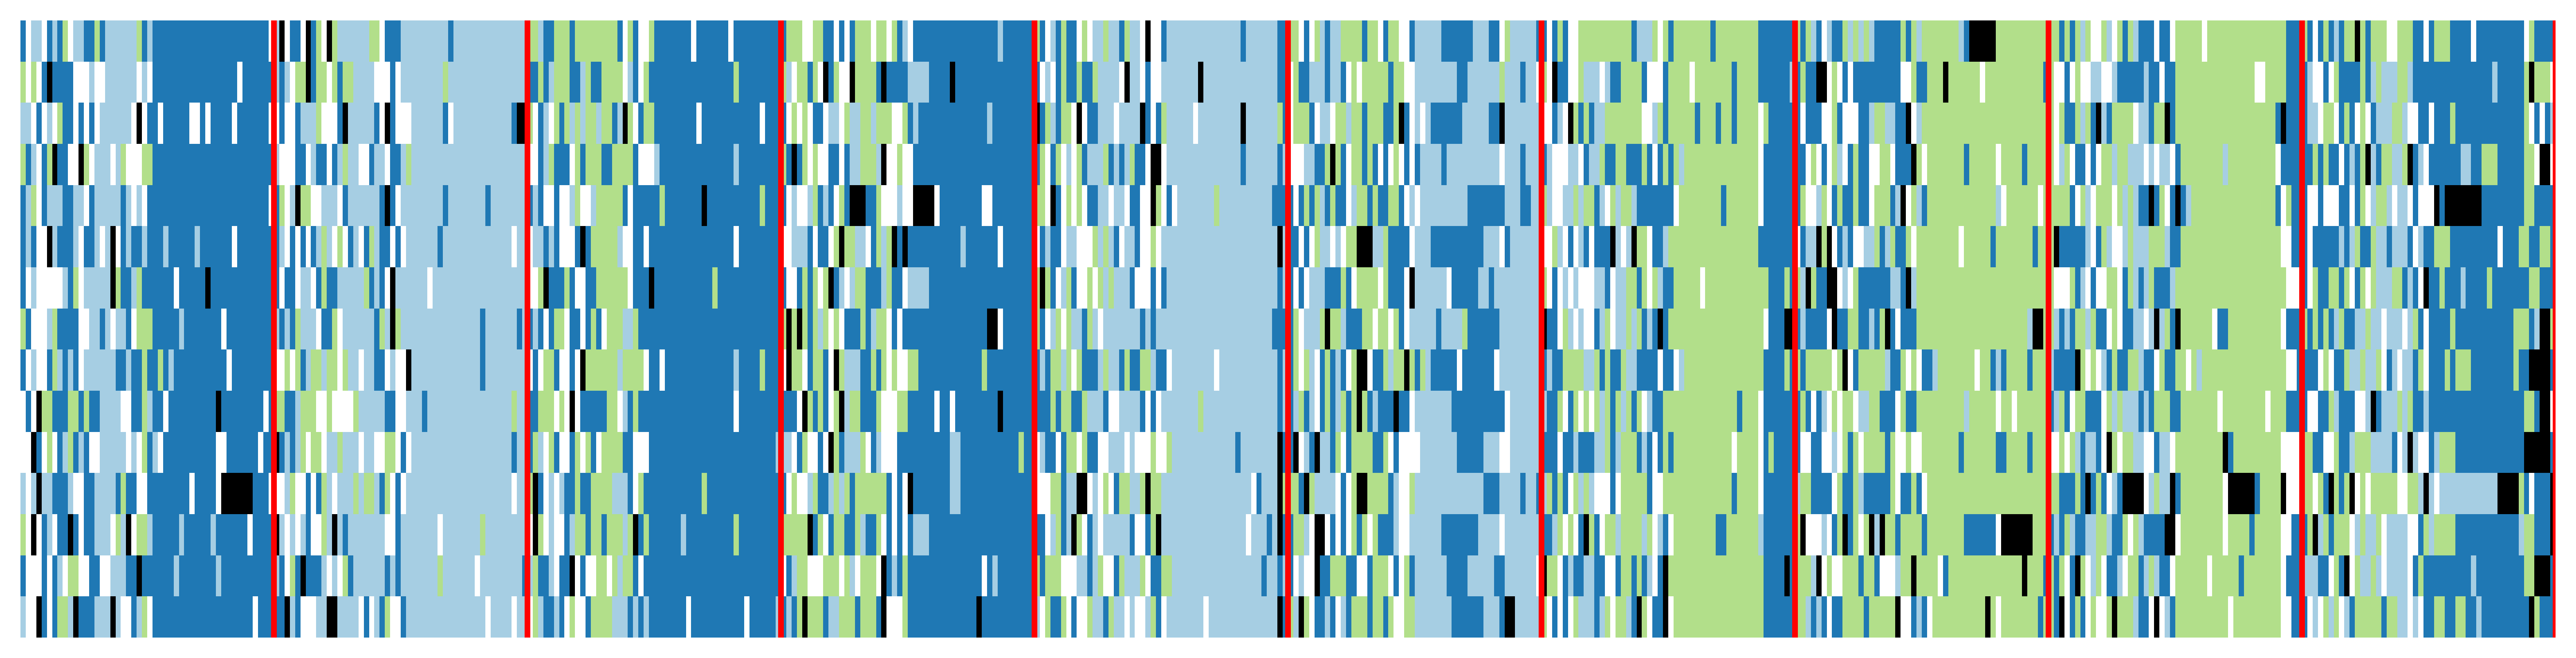

In [53]:
etho_all = np.concatenate(etho,axis=0)
f,ax = plt.subplots(1,1,figsize=(16,4),dpi=500)
flatui = ["black", "#a6cee3", "#1f78b4", "#b2df8a", "white"]
cmap=sns.color_palette(flatui)
sns.heatmap(np.transpose(etho_all),cmap=cmap, yticklabels=False, xticklabels=False, cbar=False)
for i in range(10):
    plt.axvline(x=24*2*(i+1), color='r', linewidth=2)
    
# plt.savefig("male_after_timp_ethogram.png", format="png", bbox_inches="tight")
# plt.savefig("male_before_timp_ethogram.png", format="png", bbox_inches="tight")
plt.show()


### Figure 1C. Plot activity level of mice as number of visits / transitions per hour

In [54]:
def find_n_visit(mouseId, tStart, tFinish, ehs):
    prob_box = np.array([])
    mean_logt = np.array([])
    std_logt = np.array([])
    
    ehs.mask_data(tStart, tFinish)
    duration = ehs.getdurations(mouseId)
    boxId = ehs.getaddresses(mouseId)
    period = tFinish - tStart
    
    n_visit = np.size(boxId)/2
            
    return n_visit


In [55]:
period = 60*60

n_visit_vs_t_all = np.array([]);

mouseId = ehs.mice[0]
n_visit_vs_t = np.array([])
for t_idx in np.arange(np.ceil((tFinal - tInitial)/period)):
    _, _, _, n_visit = prob_in_box(mouseId, tInitial+t_idx*period, tInitial+(t_idx+1)*period, ehs)
    n_visit_vs_t = np.append(n_visit_vs_t, n_visit)

n_visit_vs_t_all = np.array([n_visit_vs_t])


for mouseId in ehs.mice[1:15]:
    n_visit_vs_t = np.array([])
    for t_idx in np.arange(np.ceil((tFinal - tInitial)/period)):
        n_visit = find_n_visit(mouseId, tInitial+t_idx*period, tInitial+(t_idx+1)*period, ehs)
        n_visit_vs_t = np.append(n_visit_vs_t, n_visit)
        
    n_visit_vs_t_all = np.append(n_visit_vs_t_all, np.array([n_visit_vs_t]), axis=0)

/Users/chenxiaowen/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/chenxiaowen/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/chenxiaowen/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/chenxiaowen/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/chenxiaowen/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


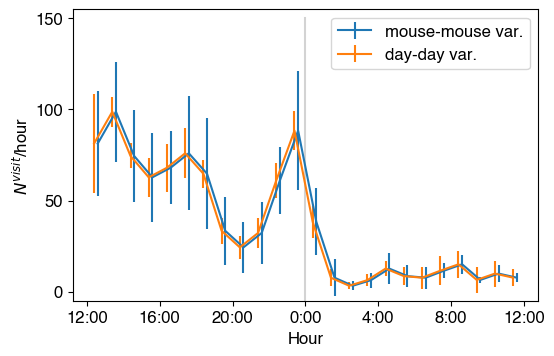

In [59]:
nvisit_eachday_eachmouse = np.reshape(n_visit_vs_t_all[:,0:240],(15,10,24))
nvisit_avgday_eachmouse = np.mean(nvisit_eachday_eachmouse,axis=1)
nvisit_eachday_avgmouse = np.mean(nvisit_eachday_eachmouse,axis=0)


f = plt.plot(figsize=(2,2),dpi=500)
plt.errorbar(np.arange(24)+0.1+0.5, np.mean(nvisit_avgday_eachmouse,axis=0),\
             np.std(nvisit_avgday_eachmouse,axis=0),\
            label="mouse-mouse var.")
plt.errorbar(np.arange(24)-0.1+0.5, np.mean(nvisit_eachday_avgmouse,axis=0),\
             np.std(nvisit_eachday_avgmouse,axis=0),\
            label="day-day var.")
plt.plot([12,12],[-10,150],color="lightgray")


font = font_manager.FontProperties(family='Helvetica', size=12)

plt.legend(prop=font)
plt.xticks(np.arange(0,25,4),["12:00", "16:00", "20:00", "0:00", "4:00", "8:00", "12:00"],
          fontsize=12, fontname='Helvetica')
plt.yticks([0,50,100,150],fontsize=12, fontname='Helvetica')
plt.xlabel("Hour", fontname="Helvetica",fontsize=12)
plt.ylabel(r"$N^{visit}$/hour", fontname="Helvetica",fontsize=12)
plt.ylim((-5,155))
plt.gca().set_aspect(0.1)
# plt.savefig("male_before_timp_nvisit.pdf", format="pdf", bbox_inches="tight")
# plt.savefig("male_after_timp_nvisit.pdf", format="pdf", bbox_inches="tight")
plt.show()